In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import sys
import os
import glob
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import GatherFeatureDatasets
from src.feature_selection import CustomRFECV
from src import plotting
from src.utils import select_N_one_standard_error

# Load results

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_selection/rfecvP_diffSeeds'
proc = GatherFeatureDatasets(is_p=True)

In [3]:
feature_names = proc.get_feature_names(18, 'dist', False)
feature_names

array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
       'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7', 'amp_ratio_8',
       'amp_ratio_9', 'amp_ratio_10', 'amp_ratio_11', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_14', 'amp_ratio_15', 'amp_ratio_16',
       'amp_ratio_17', 'amp_ratio_18', 'amp_1', 'amp_2', 'amp_3', 'amp_4',
       'amp_5', 'amp_6', 'amp_7', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km',
       'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_deg'], dtype='<U32')

In [4]:
feature_plot_names = proc.get_feature_plot_names(18, 'dist')
feature_plot_names

array(['ratio 1', 'ratio 2', 'ratio 3', 'ratio 4', 'ratio 5', 'ratio 6',
       'ratio 7', 'ratio 8', 'ratio 9', 'ratio 10', 'ratio 11',
       'ratio 12', 'ratio 13', 'ratio 14', 'ratio 15', 'ratio 16',
       'ratio 17', 'ratio 18', 'amp. 1', 'amp. 2', 'amp. 3', 'amp. 4',
       'amp. 5', 'amp. 6', 'amp. 7', 'amp. 8', 'amp. 9', 'amp. 10',
       'amp. 11', 'amp. 12', 'amp. 13', 'amp. 14', 'amp. 15', 'amp. 16',
       'amp. 17', 'amp. 18', 'sig. dom. freq.', 'sig. dom. amp.',
       'noise max. amp.', 'sig. max. amp.', 'sig. var.', 'noise var.',
       'depth', 'distance', 'back az.'], dtype='<U15')

In [5]:
with open(os.path.join(datadir, 'all.SVR.DT.rel.rfecv.json')) as fp:
    rfecv_results_dict = json.load(fp)

In [6]:
with open(os.path.join(datadir, 'all.SVR.DT.rel.rfe.full.json')) as fp:
    full_rfe_results_dict = json.load(fp)

# Results summary

In [10]:
plotting.set_default_fontsizes()

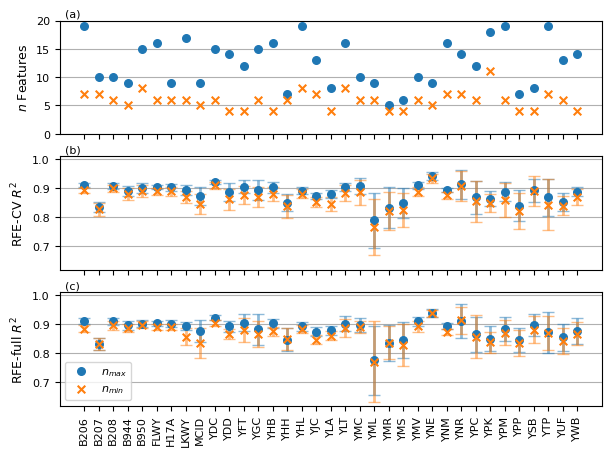

In [13]:
plotting.plot_rfecv_score_summary(rfecv_results_dict, 
                                    full_rfe_results_dict,
                                    capsize=4,
                                    score_ylims=[0.62, 1.01],
                                    grids=True,
                                    elinewidth=2,
                                    s=30,
                                    plot_N=True,
                                    N_ylims=[0, 20],
                                    savefigname='../figures/RFE_summary_P.png')

# RFECV Results - Best *N*

In [8]:
# Save without filtering out zero rows
best_feat_cnts_df = CustomRFECV.make_feature_count_df(rfecv_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_rfecv_important_feature_counts,
                                          filter_zeros=False)
best_feat_cnts_df.to_csv(os.path.join(datadir, 'feature.importance.rfecv.best.csv'))

best_feat_cnts_df = best_feat_cnts_df.loc[~(best_feat_cnts_df==0).all(axis=1)]

In [9]:
best_feat_cnts_df

,B206,B207,B208,B944,B950,FLWY,H17A,LKWY,MCID,YDC,...,YNM,YNR,YPC,YPK,YPM,YPP,YSB,YTP,YUF,YWB
Feature,,,,,,,,,,,,,,,,,,,,,
ratio 1,0,0,8,3,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ratio 2,0,0,6,0,0,0,4,5,0,0,...,0,0,1,5,0,0,7,3,3,0
ratio 3,0,1,2,1,0,3,4,3,0,0,...,0,0,0,3,0,2,7,1,0,0
ratio 4,3,5,0,0,0,2,0,4,5,0,...,0,0,0,2,0,2,7,3,7,0
ratio 5,0,0,0,2,0,0,0,2,1,0,...,0,0,4,1,6,2,0,3,3,0
ratio 6,0,5,0,0,0,0,3,0,0,6,...,0,5,8,1,5,1,6,0,8,0
ratio 7,3,0,0,0,0,0,3,0,1,1,...,0,0,0,2,0,2,3,0,7,1
ratio 8,7,4,0,1,6,0,2,0,0,4,...,3,2,1,2,0,0,0,0,2,1
ratio 9,5,0,0,5,0,0,3,0,0,8,...,1,5,0,5,3,0,0,1,2,2


In [10]:
best_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(best_feat_cnts_df)
best_feat_summary_df

,Feature,cnt
43,distance,350
44,back az.,326
42,depth,303
40,sig. var.,267
18,amp. 1,252
37,sig. dom. amp.,245
19,amp. 2,235
20,amp. 3,202
21,amp. 4,202
39,sig. max. amp.,195


In [11]:
best_feat_summary_df[best_feat_summary_df.cnt > best_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
43,distance,350
44,back az.,326
42,depth,303
40,sig. var.,267
18,amp. 1,252
37,sig. dom. amp.,245
19,amp. 2,235
20,amp. 3,202
21,amp. 4,202
39,sig. max. amp.,195


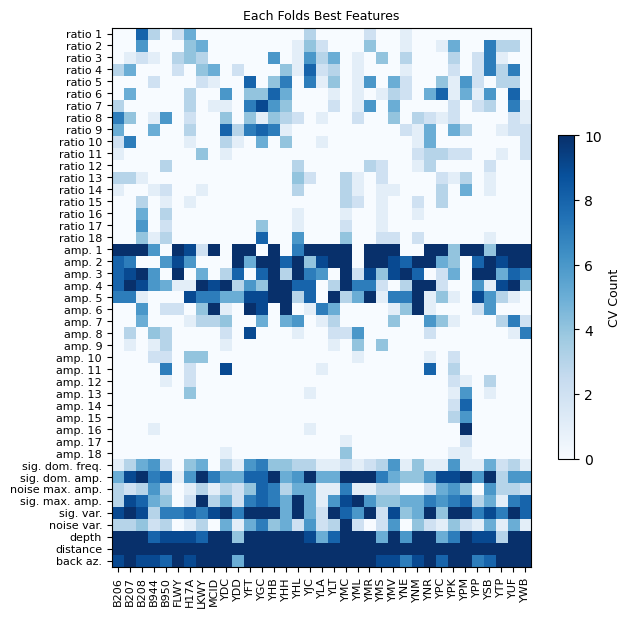

In [12]:
plotting.plot_rfecv_feature_heatmap(best_feat_cnts_df,
                                    figsize=(7, 7),
                                    title='Each Folds Best Features')

# RFECV Results 1 St. Error *N*

In [13]:
# Save without filtering out zero rows
oste_feat_cnts_df = CustomRFECV.make_feature_count_df(rfecv_results_dict, 
                      feature_plot_names,
                      CustomRFECV.get_rfecv_important_feature_counts,
                      oste_feats=True,
                      filter_zeros=False)
oste_feat_cnts_df.to_csv(os.path.join(datadir, 'feature.importance.rfecv.oste.csv'))
oste_feat_cnts_df = oste_feat_cnts_df.loc[~(oste_feat_cnts_df==0).all(axis=1)]

In [14]:
oste_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(oste_feat_cnts_df)
oste_feat_summary_df

,Feature,cnt
40,distance,344
15,amp. 1,238
16,amp. 2,195
37,sig. var.,150
39,depth,109
34,sig. dom. amp.,103
17,amp. 3,102
18,amp. 4,101
41,back az.,89
19,amp. 5,82


In [15]:
oste_feat_summary_df[oste_feat_summary_df.cnt > oste_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
40,distance,344
15,amp. 1,238
16,amp. 2,195
37,sig. var.,150
39,depth,109
34,sig. dom. amp.,103
17,amp. 3,102
18,amp. 4,101
41,back az.,89
19,amp. 5,82


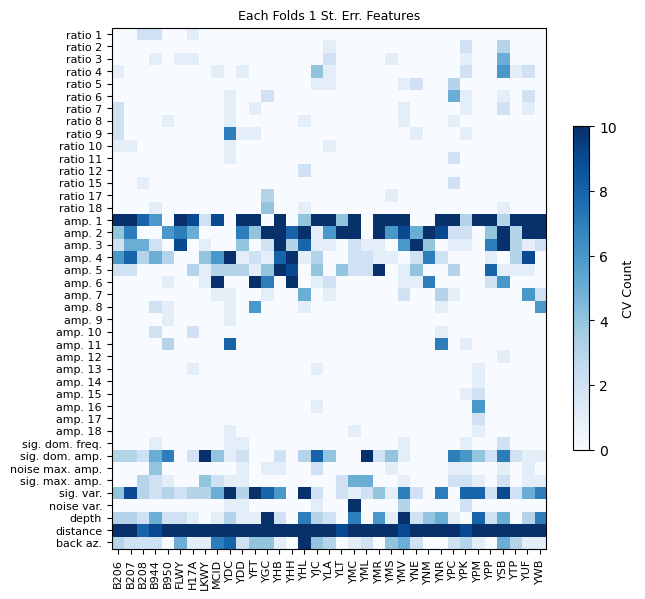

In [16]:
plotting.plot_rfecv_feature_heatmap(oste_feat_cnts_df,
                                    figsize=(7, 7),
                                    title='Each Folds 1 St. Err. Features')

# Best *N* Selected Features from Full Training Sets

In [17]:
selected_best_features_df = CustomRFECV.make_feature_count_df(full_rfe_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_selected_feature_counts,
                                          filter_zeros=False)
selected_best_features_df.to_csv(os.path.join(datadir, 'feature.importance.rfe.full.best.csv'))
selected_best_features_df = selected_best_features_df.loc[~(selected_best_features_df==0).all(axis=1)]

In [18]:
sel_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(selected_best_features_df)
sel_feat_summary_df

,Feature,cnt
41,distance,35
42,back az.,33
40,depth,31
18,amp. 1,27
38,sig. var.,27
35,sig. dom. amp.,26
19,amp. 2,25
21,amp. 4,21
37,sig. max. amp.,20
20,amp. 3,20


In [19]:
sel_feat_summary_df[sel_feat_summary_df.cnt > sel_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
41,distance,35
42,back az.,33
40,depth,31
18,amp. 1,27
38,sig. var.,27
35,sig. dom. amp.,26
19,amp. 2,25
21,amp. 4,21
37,sig. max. amp.,20
20,amp. 3,20


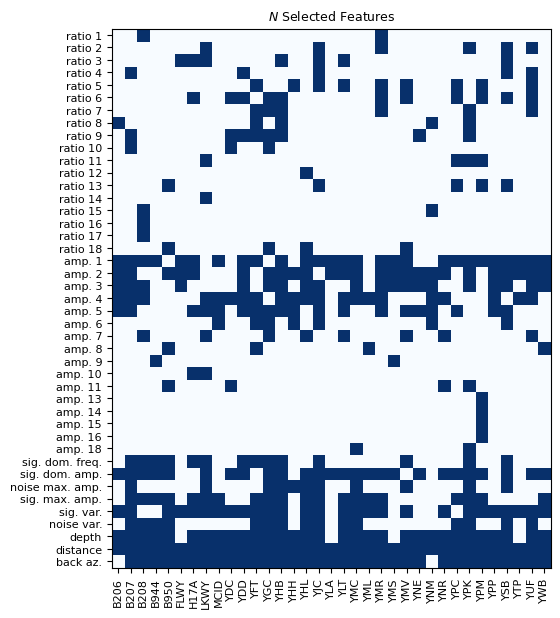

In [20]:
plotting.plot_rfecv_feature_heatmap(selected_best_features_df, 
                                    plot_colorbar=False,
                                    fontsize=8,
                                    figsize=(7, 7),
                                    title='$\it{N}$ Selected Features')

# 1 St. Err. *N* Selected Features from Full Training Sets

In [21]:
selected_oste_features_df = CustomRFECV.make_feature_count_df(full_rfe_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_selected_feature_counts,
                                          oste_feats=True,
                                          filter_zeros=False)
selected_oste_features_df.to_csv(os.path.join(datadir, 'feature.importance.rfe.full.oste.csv'))
selected_oste_features_df = selected_oste_features_df.loc[~(selected_oste_features_df==0).all(axis=1)]                                         

In [22]:
sel_oste_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(selected_oste_features_df)
sel_oste_feat_summary_df

,Feature,cnt
23,distance,35
7,amp. 1,26
8,amp. 2,23
20,sig. var.,21
24,back az.,16
22,depth,15
9,amp. 3,12
10,amp. 4,11
17,sig. dom. amp.,11
11,amp. 5,9


In [23]:
sel_oste_feat_summary_df[sel_oste_feat_summary_df.cnt > sel_oste_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
23,distance,35
7,amp. 1,26
8,amp. 2,23
20,sig. var.,21
24,back az.,16
22,depth,15


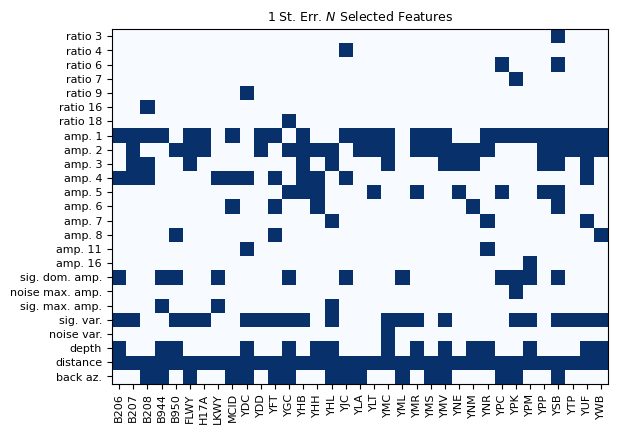

In [24]:
plotting.plot_rfecv_feature_heatmap(selected_oste_features_df, 
                                    plot_colorbar=False,
                                    title='1 St. Err. $\it{N}$ Selected Features')